# Statistical Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week2/03_stats.ipynb)


## Data Cleaning, Filtering, and Basic Statistics with Gaia Data

You've learned the fundamental building blocks of Pandas: creating DataFrames, selecting data, and performing basic operations. Now, let's apply these skills to a dataset that represents a real-world astronomical catalog: data from the Gaia mission.

The European Space Agency's Gaia mission is creating the most precise 3D map of the Milky Way ever made, observing billions of stars. Working with such a vast and detailed dataset requires robust tools. Real astronomical data, even from missions as sophisticated as Gaia, often has complexities:

Missing Values: Not all measurements are successful for every star (e.g., missing parallax measurements for distant stars).

Outliers or Errors: Sometimes data points might be incorrect or represent unusual objects.

Selecting Specific Samples: You rarely analyze the entire catalog; you need to filter for stars in a specific region, within a certain brightness range, or with particular properties.

In this section, we will use Pandas to work with a simplified version of Gaia data (or a sample with similar characteristics). We will demonstrate how to:

Load the data into a DataFrame (often from a file).

Inspect the data for missing values or get a quick overview.

Filter the DataFrame to select subsets of interest (e.g., only stars with reliable measurements, or stars within a certain distance range).

Perform basic statistical calculations on the filtered data (e.g., find the average parallax, the brightest star in your sample, or the number of objects of a certain type).

This is a crucial step in preparing real astronomical data for more advanced analysis or visualisation.

**Key Terms:**

* **DataFrames** are powerful tables for storing, cleaning, and exploring data.

* **Rows** represent individual records (like each star).

* **Columns** represent properties (like brightness, distance).

* **NaN** means missing data.

* **Filtering** lets us focus on just the data we care about.

* **Vectorized** operations make calculations fast and easy.

* **basic statistics** (mean, median, standard deviation) to understand our data.

* **Correlation** checks if two columns are related.

* **Plotting** helps us see patterns in our data.

**Note**
If you are running this jupyter notebook from Colab, then run the next cell by pressing `SHIFT+ENTER` to install the required packages for this notebook. Otherwise, skip the next cell.

In [ ]:
!pip install numpy pandas matplotlib scipy statsmodels

### **1. Setup: Import Libraries and Load Data**

In [1]:
# 1. Importing Libraries
import pandas as pd   # 'pd' is short for pandas, the library that gives us DataFrames (our data tables).
import numpy as np    # 'np' is short for numpy, which helps with math and arrays (lists of numbers).
from scipy import stats # For advanced statistics.
import statsmodels.api as sm # For even more statistics and models.

# 2. Load Gaia Data
df = pd.read_csv('data/gaia-hrd.csv')

# If you are using Google Colab, uncomment the next line:
# df = pd.read_csv("https://raw.githubusercontent.com/Danselem/brics_astro/main/Week2/data/gaia-hrd.csv")

# Show the first 5 rows of the DataFrame.
# (Imagine df as a big table of stars: each row is a star, each column is a property like brightness.)
df.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_over_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mg
0,5542245319386060288,128.082874,-36.997840,-31.597539,55.733054,10.911685,71.94558,18.333282,18.427774,17.885862,0.541912,13.522742
1,5542245319397657472,128.084596,-36.998033,-32.540762,58.041920,10.848546,602.55927,14.110725,15.709354,12.885056,2.824299,9.287583
2,5542415846778481920,128.564266,-35.815318,-3.461656,-37.194745,14.024835,1255.10290,13.113724,14.119819,12.119724,2.000094,8.848212
3,5542415846778484608,128.561657,-35.815391,-3.528435,-38.697425,14.022714,359.34033,16.154750,17.736862,14.934289,2.802573,11.888911
4,5542770336201711488,127.943541,-34.926597,-133.068824,-18.808747,14.156612,452.39978,15.625710,17.195644,14.410464,2.785180,11.380506


### **2. Data Cleaning: Remove Problematic Values**

Let's clean the data by removing stars with:
- Negative or zero parallax (distance can't be negative)
- Missing (`NaN`) values

In [2]:
# Remove stars with parallax  0]

# Remove any stars with missing values (NaN means "empty box" or missing data).
df = df.dropna()

print(f"Rows after cleaning: {len(df)}")
# (Now our DataFrame only has stars where we know all the important information.)


Rows after cleaning: 12366


### **3. Data Filtering: Focus on Bright, Nearby Stars**

Suppose we want only stars that are brighter than 5 (G magnitude < 5) and parallax greater than 2:

In [10]:

filtered_df = df[(df['phot_g_mean_mag'] < 5) & (df['parallax'] > 2)]
print(filtered_df.shape)
filtered_df.head()
# (We make a new DataFrame called filtered_df. It only keeps stars that are bright (G magnitude < 15)
# and close to us (parallax > 2). This is called "filtering" the data.)


(41, 13)


,source_id,ra,dec,pmra,pmdec,parallax,parallax_over_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mg,distance_pc
249,4281199284413726208,284.055154,4.203745,46.474018,31.312731,24.269567,138.41821,4.568889,4.661161,4.404667,0.256494,1.494199,41.203866
250,4281199318773462016,284.061227,4.202254,50.043812,28.363343,24.531043,226.54736,4.925873,5.039706,4.730397,0.309309,1.874453,40.764676
938,5338833263117260672,163.374239,-58.852998,78.168773,38.800125,33.522466,358.92407,3.533434,4.077420,2.888392,1.189028,1.160114,29.830741
1068,5877059048308526720,229.377706,-58.801812,-97.182091,-136.055432,33.820454,134.45961,4.060981,4.088622,3.951576,0.137046,1.706878,29.567906
1145,2027458764012840576,300.275493,27.753591,57.816973,3.994316,13.442694,128.05238,4.627144,4.705686,4.435495,0.270190,0.269575,74.389853


### **4. Calculate New Columns**

Let's add a **distance** column (in parsecs):

In [4]:

# parallax is how much a star seems to move, measured in tiny angles.
# (We can figure out how far away a star is by dividing 1000 by its parallax number.
# This gives us distance in parsecs, which is a way to measure how far stars are.)

df['distance_pc'] = 1000 / df['parallax'] 

# We add a new column to our DataFrame called 'distance_pc'.
# This uses a formula to turn parallax into distance in parsecs (a unit for star distances).
df.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_over_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,mg,distance_pc
0,5542245319386060288,128.082874,-36.997840,-31.597539,55.733054,10.911685,71.94558,18.333282,18.427774,17.885862,0.541912,13.522742,91.644870
1,5542245319397657472,128.084596,-36.998033,-32.540762,58.041920,10.848546,602.55927,14.110725,15.709354,12.885056,2.824299,9.287583,92.178247
2,5542415846778481920,128.564266,-35.815318,-3.461656,-37.194745,14.024835,1255.10290,13.113724,14.119819,12.119724,2.000094,8.848212,71.302089
3,5542415846778484608,128.561657,-35.815391,-3.528435,-38.697425,14.022714,359.34033,16.154750,17.736862,14.934289,2.802573,11.888911,71.312873
4,5542770336201711488,127.943541,-34.926597,-133.068824,-18.808747,14.156612,452.39978,15.625710,17.195644,14.410464,2.785180,11.380506,70.638369


### **5. Basic Statistics**

#### **A. Summary Statistics**

In [5]:


print("Mean G Magnitude:", df['phot_g_mean_mag'].mean())
# Mean is the average value in the column 'phot_g_mean_mag' - how bright, on average, the stars are.

print("Median Parallax:", df['parallax'].median())
# Median is the middle value if we line up all the parallax numbers from smallest to biggest.

print("Standard Deviation of pmra:", df['pmra'].std())
# Standard deviation tells us how much the pmra values are spread out from the average.


Mean G Magnitude: 13.906374901811418
Median Parallax: 12.668849430955
Standard Deviation of pmra: 118.70508046746373


#### **B. Correlation**

In [6]:
df[['parallax', 'phot_g_mean_mag', 'pmra', 'pmdec']].corr()
# Correlation tells us if two things move together.
# For example, if stars are closer (higher parallax), are they also brighter (lower magnitude)?

,parallax,phot_g_mean_mag,pmra,pmdec
parallax,1.000000,-0.158439,-0.111996,-0.102405
phot_g_mean_mag,-0.158439,1.000000,0.001472,0.032965
pmra,-0.111996,0.001472,1.000000,-0.064362
pmdec,-0.102405,0.032965,-0.064362,1.000000


### **6. Distributions: Plotting with Pandas/Matplotlib**

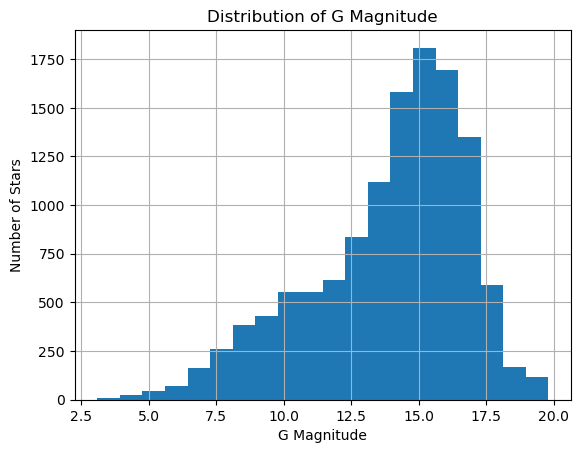

In [7]:

import matplotlib.pyplot as plt

# We can create plots to show how our data is spread out.
# For example, a histogram of star distances or brightness.

# Histogram of G Magnitude
df['phot_g_mean_mag'].hist(bins=20)
plt.xlabel('G Magnitude')
plt.ylabel('Number of Stars')
plt.title('Distribution of G Magnitude')
plt.show()



### **7. Hypothesis Testing with SciPy**
**Example:** Do bright stars (G < 15) have different average proper motion ['pmra'] than fainter stars (G ≥ 15)?

In [8]:
bright = df[df['phot_g_mean_mag'] < 15]['pmra']
faint = df[df['phot_g_mean_mag'] >= 15]['pmra']

t_stat, p_value = stats.ttest_ind(bright, faint)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference!")
else:
    print("No significant difference found.")


T-statistic: 0.26, p-value: 0.7983
No significant difference found.


### **Statistical Test: t-test**

- `stats.ttest_ind(bright, faint)` runs an **independent two-sample t-test**.
- This test checks if the **average pmra** (proper motion in RA) is different between bright and faint stars.
- **T-statistic**: Measures how different the two group means are, relative to the variation in the data.
- **p-value**: Tells us the probability of seeing such a difference just by chance.

---

### **Interpreting the Result**

- If `p_value >= 0.05`, we say **no significant difference** is found.

## Technical Terms Used

- **Filtering**: Selecting only the rows that meet certain criteria (e.g., bright or faint stars).
- **t-test**: A statistical test to compare the means of two groups.
- **T-statistic**: A number that tells us how different the means are, taking into account the spread of the data.
- **p-value**: The probability that the observed difference happened by random chance (lower is more significant).
- **Statistically significant**: Means the difference is probably real, not just random.

### **8. Simple Regression with Statsmodels**
**Example:** Predict G magnitude using distance.



Performing a **simple linear regression** using the statsmodels library to see how the distance to a star (in parsecs) relates to its brightness (G-band magnitude).


#### `x = sm.add_constant(df['distance_pc'])`
- **What is `df['distance_pc']`?**
  - This is a column in your DataFrame that gives the distance to each star in parsecs.
- **What does `sm.add_constant()` do?**
  - It adds a column of 1s to `X`. This is called the **intercept** or **constant term** in regression. It allows the line to be shifted up or down on the graph, instead of always passing through the origin (0,0).

#### `y = df['phot_g_mean_mag']`
- **What is `y`?**
  - This is the column with the G-band mean magnitude (brightness) for each star. In astronomy, a lower magnitude means a brighter star.

#### `model = sm.OLS(y, X).fit()`
- **What is `sm.OLS`?**
  - OLS stands for **Ordinary Least Squares**, a method for fitting a straight line to data.
  - Here, you are telling statsmodels to fit a regression model where `y` (brightness) is predicted by `X` (distance).
- **What does `.fit()` do?**
  - It calculates the best-fitting line for your data.

#### `print(model.summary())`
- **What does this do?**
  - It prints a detailed summary of the regression results, including:
    - The coefficients (slope and intercept)
    - R-squared (how well the line fits the data)
    - p-values (whether the relationship is statistically significant)
    - Standard errors, confidence intervals, and more

In [10]:
X = sm.add_constant(df['distance_pc'])  # Add intercept
y = df['phot_g_mean_mag']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        phot_g_mean_mag   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     58.28
Date:                Fri, 16 May 2025   Prob (F-statistic):           3.08e-14
Time:                        12:58:52   Log-Likelihood:                -5720.3
No. Observations:                2861   AIC:                         1.144e+04
Df Residuals:                    2859   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.8898      0.064    247.180      

## What does the output mean?

- **coef (coefficients):**  
  - The intercept (constant) and the slope for distance.  
  - The slope tells you how much the G magnitude (brightness) changes for each parsec farther away.
- **R-squared:**  
  - A number between 0 and 1 that says how much of the change in brightness can be explained by distance. Closer to 1 means a better fit.
- **p-value:**  
  - If it’s less than 0.05, the relationship is considered statistically significant.
- **std err:**  
  - Standard error - tells you how much the estimated coefficient might vary.



## Technical Terms

- **Regression:** A way to model the relationship between two or more variables.
- **Intercept:** The value where the regression line crosses the y-axis (when distance is zero).
- **Slope:** How much the y-value (brightness) changes for each unit increase in x (distance).
- **OLS (Ordinary Least Squares):** The most common method for fitting a straight line to data.
- **p-value:** Probability that the observed relationship is due to random chance.
- **R-squared:** Proportion of variance in the dependent variable explained by the independent variable.



### 📝  **Homework Questions**
1. **Data Cleaning:**
Remove all stars with a parallax error greater than 20%.
(Hint: If you don't have a 'parallax_error' column, assume it is 0.1 for all stars.)

2. **Filtering:**
Make a new DataFrame of stars with `distance_pc` less than 50 parsecs and `phot_g_mean_mag` less than 14.

3. **Statistics:**
What is the mean and median proper motion in declination (`pmdec`) for stars with G magnitude brighter than 13?

4. **Hypothesis Testing:**
Use a t-test to check if the mean parallax of stars with `pmra > 0` is different from those with `pmra < 0`.

5. **Regression:**
Use statsmodels to predict `phot_g_mean_mag` using both `distance_pc` and `parallax`.
(Which variable is a stronger predictor?)



## 💡 Tips

- Use `df.describe()` for quick stats.
- Use `df[(condition)]` for filtering.
- For more plotting, try `df['column'].plot.hist()`.

**Additional Resources**

Exploratory Data Analysis with Pandas <https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html>